# Multi-layer FNN on MNIST

This is MLP (784-X^W-10) on MNIST. SGD algorithm (lr=0.1) with 100 epoches.

 

In [2]:
import os, sys
import numpy as np
from matplotlib.pyplot import *
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import itertools
import scipy.io as sio

%matplotlib inline

In [13]:
depth = [1,2,3,4,5]
width = [50,100,200,400]
data = sio.loadmat('data_optimizer_cmp/fnn_mnist_all_sgd_local.mat')

acc_test_all   = data['acc_solved_all'] 
num_param_all  = data['num_param_all'] 
dim_solved_all = data['dim_solved_all'] 
acc_solved_all = data['acc_solved_all'] 


In [14]:
print "Baseline results"
print acc_test_all

print "# Parmas"
print num_param_all

print "Cross-line results"
print acc_solved_all

print "Cross-line Dim"
print dim_solved_all


Baseline results
[[ 0.8808  0.8748  0.8797  0.1066  0.1473]
 [ 0.8845  0.884   0.8851  0.8829  0.8852]
 [ 0.8862  0.8982  0.8879  0.8884  0.8922]
 [ 0.8859  0.8913  0.8871  0.8903  0.8875]]
# Parmas
[[  39760.   42310.   44860.   47410.   49960.]
 [  79510.   89610.   99710.  109810.  119910.]
 [ 159010.  199210.  239410.  279610.  319810.]
 [ 318010.  478410.  638810.  799210.  959610.]]
Cross-line results
[[ 0.8808  0.8748  0.8797  0.1066  0.1473]
 [ 0.8845  0.884   0.8851  0.8829  0.8852]
 [ 0.8862  0.8982  0.8879  0.8884  0.8922]
 [ 0.8859  0.8913  0.8871  0.8903  0.8875]]
Cross-line Dim
[[ 475.  425.  450.   10.   10.]
 [ 525.  500.  500.  500.  475.]
 [ 550.  550.  500.  550.  575.]
 [ 550.  600.  575.  575.  575.]]


#### List the config of depth and width, which yields errors in training

Error in the following configs: width, depth and dim
[]
[]
[]
Shape of accuracy tensor: (1, 1, 32)
[ 0.11356  0.1169   0.22276  0.32912  0.42362  0.50796  0.59456  0.68228
  0.74778  0.7934   0.8173   0.84238  0.847    0.85462  0.8422   0.1092
  0.10796  0.10698  0.10658  0.10546  0.10534  0.1054   0.10634  0.10576
  0.10468  0.10436  0.10384  0.10286  0.10264  0.10276  0.1032   0.10328]


-------------------------

#### Check the accuracy of specific depth and width, along different dim

Reshape the tensor to 1D for plots

### Testing Accuracy wrt. Width, Depth and Dim

#### Testing Accuracy of Intrinsic dim for #parameters

#### Intrinsic dim for #parameters

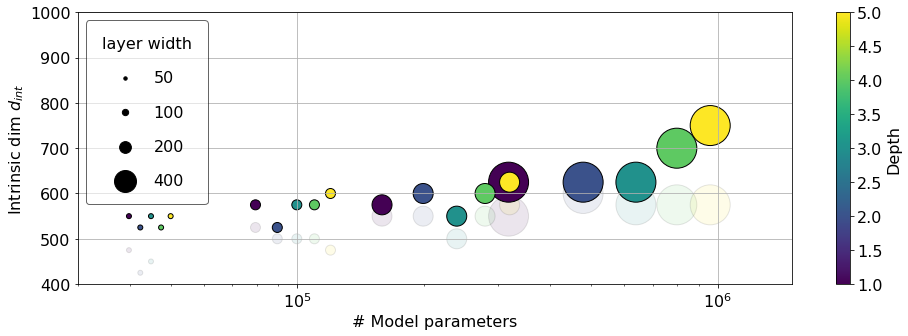

In [50]:
fig = plt.figure(figsize=(16,5))

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)



data = sio.loadmat('data_optimizer_cmp/fnn_mnist_all_sgd_local.mat')
num_param_all  = data['num_param_all']
dim_solved_all = data['dim_solved_all']
fig_params_1d = num_param_all.reshape(len(depth)*len(width),order='F')
dim_solved_all_1d = dim_solved_all.reshape(len(depth)*len(width),order='F')

plt.scatter(fig_params_1d, dim_solved_all_1d, s=(np.array(fig_width)**2.0)/100, c=fig_depth, alpha=0.1, edgecolors='k') 


data = sio.loadmat('data_optimizer_cmp/fnn_mnist_all_adam_local.mat')
num_param_all  = data['num_param_all']
dim_solved_all = data['dim_solved_all']
fig_params_1d = num_param_all.reshape(len(depth)*len(width),order='F')
dim_solved_all_1d = dim_solved_all.reshape(len(depth)*len(width),order='F')

plt.scatter(fig_params_1d, dim_solved_all_1d, s=(np.array(fig_width)**2.0)/100, c=fig_depth, edgecolors='k') 

ax = plt.gca()
cbar = plt.colorbar(label="Depth")
from matplotlib.ticker import MaxNLocator

# arange(12)
# cbar.ax.yaxis.set_major_locator(MaxNLocator(nbins=5,integer=True))


ax.set_xscale('log')
ax.grid(True)
ax.set_ylim(400, 1000)

plt.xlabel('# Model parameters')
plt.ylabel('Intrinsic dim $d_{int}$')
ax.set_xlim(0.3E5, 1.5E6)

#make a legend:
pws = width
for pw in pws:
    plt.scatter([], [], s=(pw**1.8)/100, c="k",label=str(pw))

h, l = plt.gca().get_legend_handles_labels()
plt.legend(h[0:], l[0:], labelspacing=1.2, title="layer width", borderpad=1, 
            frameon=True, framealpha=0.6, edgecolor="k", facecolor="w",loc='best')

fig.savefig("figs/fnn_mnist_local_optimizer_cmp.pdf", bbox_inches='tight')

## Performance comparison with Baseline

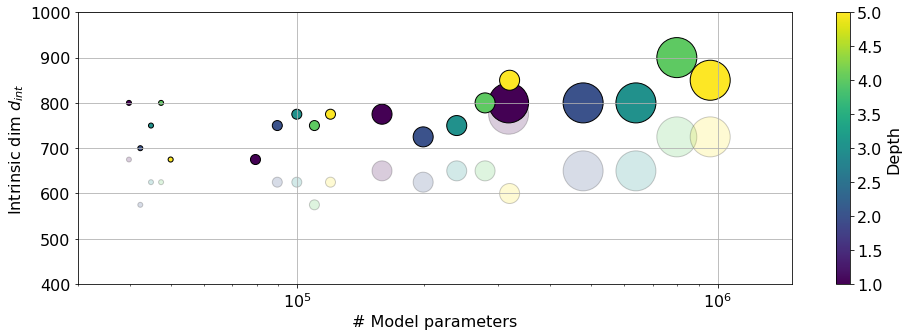

In [43]:
fig = plt.figure(figsize=(16,5))

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)



data = sio.loadmat('data_optimizer_cmp/fnn_mnist_all_sgd_global.mat')
num_param_all  = data['num_param_all']
dim_solved_all = data['dim_solved_all']
fig_params_1d = num_param_all.reshape(len(depth)*len(width),order='F')
dim_solved_all_1d = dim_solved_all.reshape(len(depth)*len(width),order='F')

plt.scatter(fig_params_1d, dim_solved_all_1d, s=(np.array(fig_width)**2.0)/100, c=fig_depth, alpha=0.2, edgecolors='k') 


data = sio.loadmat('data_optimizer_cmp/fnn_mnist_all_adam_global.mat')
num_param_all  = data['num_param_all']
dim_solved_all = data['dim_solved_all']
fig_params_1d = num_param_all.reshape(len(depth)*len(width),order='F')
dim_solved_all_1d = dim_solved_all.reshape(len(depth)*len(width),order='F')

plt.scatter(fig_params_1d, dim_solved_all_1d, s=(np.array(fig_width)**2.0)/100, c=fig_depth, edgecolors='k') 


ax = plt.gca()
plt.colorbar(label="Depth")

ax.set_xscale('log')
ax.grid(True)
ax.set_ylim(400, 1000)

plt.xlabel('# Model parameters')
plt.ylabel('Intrinsic dim $d_{int}$')
ax.set_xlim(0.3E5, 1.5E6)

#make a legend:
# pws = width
# for pw in pws:
#     plt.scatter([], [], s=(pw**1.8)/100, c="k",label=str(pw))

# h, l = plt.gca().get_legend_handles_labels()
# plt.legend(h[0:], l[0:], labelspacing=1.2, title="layer width", borderpad=1, 
#             frameon=True, framealpha=0.6, edgecolor="k", facecolor="w",loc='best')

fig.savefig("figs/fnn_mnist_global_optimizer_cmp.pdf", bbox_inches='tight')